<a href="https://colab.research.google.com/github/06Priya-s/PRODIGY_GA_05/blob/main/Neural_style_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load Images (same as Method 1)
def load_image(path, max_dim=512):
    img = Image.open(path)
    img.thumbnail((max_dim, max_dim))
    return np.array(img)

content_path = "/content/drive/MyDrive/gir;.jpg" # Your content image (e.g., a photo)
style_path = "/content/drive/MyDrive/famous_painting.jpg" # Your style image (e.g., a painting)

content_img = load_image(content_path)
style_img = load_image(style_path)

# Convert to TensorFlow tensors and normalize
content_img = tf.image.convert_image_dtype(content_img, tf.float32)
style_img = tf.image.convert_image_dtype(style_img, tf.float32)

# Add batch dimension (required by TF Hub model)
content_img = tf.expand_dims(content_img, axis=0)
style_img = tf.expand_dims(style_img, axis=0)



In [3]:
# Step 2: Load TF Hub Model (replaces Method 1's VGG19 setup)
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Step 3: Apply Style Transfer (no training loop needed!)
stylized_img = hub_model(content_img, style_img)[0]

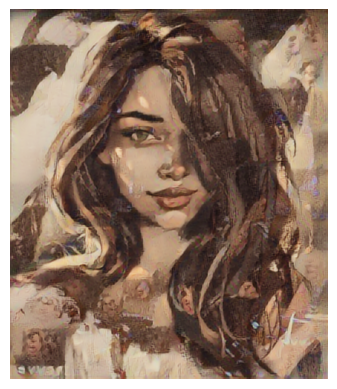

In [4]:
# Step 3: Apply Style Transfer (no training loop needed!)
stylized_img = hub_model(content_img, style_img)[0]

# Step 4: Display Result
def tensor_to_image(tensor):
    tensor = tensor.numpy()[0]  # Remove batch dim → (H, W, 3)
    tensor = np.clip(tensor * 255, 0, 255).astype('uint8')
    return Image.fromarray(tensor)

stylized_img = tensor_to_image(stylized_img)

# Display
plt.imshow(stylized_img)
plt.axis('off')
plt.show()